In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame

# Data Preparation

In [2]:
#ReadDataset
dt_test = pd.read_csv("salju_test.csv")
dt_train = pd.read_csv("salju_train.csv")

In [3]:
dt_cluster = pd.concat([dt_test,dt_train], ignore_index=True)

## Data Exploration

In [4]:
dt_cluster.head()

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,...,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok,id
0,04/11/2010,C39,11.0,27.5,0.0,NaN,6.4,WSW,46.0,W,...,56.0,1013.0,1012.4,4.0,7.0,25.7,23.6,No,No,NaN
1,26/03/2015,C35,10.0,19.9,0.2,NaN,NaN,WNW,56.0,W,...,32.0,1017.0,1015.2,8.0,1.0,10.7,18.9,No,Yes,NaN
2,22/03/2016,C18,9.2,27.2,0.0,5.2,10.4,SSW,33.0,NE,...,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,No,No,NaN
3,09/12/2011,C31,17.7,27.0,0.0,4.6,6.7,SW,35.0,E,...,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,No,No,NaN
4,20/05/2017,C14,2.3,7.9,88.0,NaN,NaN,NW,46.0,W,...,95.0,NaN,NaN,NaN,NaN,4.4,6.0,Yes,No,NaN


In [5]:
dt_cluster.tail()

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,...,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok,id
127272,31/01/2009,C38,20.1,23.7,0.0,7.2,8.9,ESE,43.0,SE,...,70.0,1019.3,1017.6,4.0,6.0,22.0,22.1,Tidak,Ya,109091.0
127273,03/11/2010,C16,15.7,25.2,0.0,NaN,NaN,SSE,37.0,SSE,...,52.0,1018.4,1016.2,NaN,NaN,23.8,24.4,Tidak,Ya,109092.0
127274,11/11/2010,C17,7.5,20.4,1.6,NaN,NaN,NW,33.0,N,...,51.0,1014.5,1010.6,NaN,NaN,12.6,19.8,Ya,Tidak,109093.0
127275,16/04/2012,C11,10.8,29.8,0.0,7.8,11.2,E,48.0,ESE,...,18.0,1020.0,1015.8,0.0,1.0,21.7,29.2,Tidak,Tidak,109094.0
127276,09/10/2011,C16,12.3,27.4,9.0,NaN,NaN,WNW,35.0,NNE,...,76.0,1010.4,1005.4,NaN,NaN,20.4,23.3,Ya,Tidak,109095.0


In [6]:
dt_cluster.shape

(127277, 24)

In [7]:
dt_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127277 entries, 0 to 127276
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Tanggal                   127277 non-null  object 
 1   KodeLokasi                127277 non-null  object 
 2   SuhuMin                   125990 non-null  float64
 3   SuhuMax                   126183 non-null  float64
 4   Hujan                     124459 non-null  float64
 5   Penguapan                 72397 non-null   float64
 6   SinarMatahari             66180 non-null   float64
 7   ArahAnginTerkencang       118252 non-null  object 
 8   KecepatanAnginTerkencang  118307 non-null  float64
 9   ArahAngin9am              118046 non-null  object 
 10  ArahAngin3pm              123584 non-null  object 
 11  KecepatanAngin9am         125726 non-null  float64
 12  KecepatanAngin3pm         124620 non-null  float64
 13  Kelembaban9am             124945 non-null  f

In [8]:
for col in dt_cluster.columns:
    print(col,dt_cluster[col].unique())

Tanggal ['04/11/2010' '26/03/2015' '22/03/2016' ... '27/11/2007' '09/12/2007'
 '29/03/2008']
KodeLokasi ['C39' 'C35' 'C18' 'C31' 'C14' 'C22' 'C10' 'C3' 'C7' 'C24' 'C9' 'C44'
 'C28' 'C23' 'C2' 'C4' 'C33' 'C34' 'C41' 'C16' 'C37' 'C11' 'C19' 'C15'
 'C6' 'C46' 'C32' 'C8' 'C43' 'C25' 'C48' 'C45' 'C13' 'C27' 'C5' 'C12'
 'C20' 'C17' 'C42' 'C1' 'C30' 'C26' 'C29' 'C40' 'C49' 'C21' 'C38' 'C36'
 'C47']
SuhuMin [11.  10.   9.2 17.7  2.3 18.4 12.4 14.4 20.3 14.7  8.1 23.8 13.2  9.4
  8.  10.5  6.9 11.9 17.2 10.9 14.1 21.   7.   5.3 -0.3  4.2 15.8 12.2
 20.5  3.  11.2  6.4 14.2 21.8 10.2 24.1 16.3  6.2  6.  20.8 11.5  4.6
 15.4 13.8 13.3 17.1  1.7 20.7  9.1 16.6 20.6 16.9  6.3 23.9 19.1 19.8
 10.1 17.9  0.7 11.4 27.4 26.6 18.5 21.5  8.5 10.3  8.6 18.8  7.5 13.
 14.5  3.3 16.2  9.8 23.5 14.   1.   0.8 22.6  7.4 15.2 13.5 14.8  1.2
 15.1 12.9 -1.1 16.7 20.1 17.8  2.9  4.7  9.7  7.1  1.1  3.2  9.9  8.8
 18.7 15.3  5.7  6.6  2.7 17.4 11.7  4.4 16.4 17.6  2.5  0.9 24.5 14.3
  2.6  3.7 16.8 25.7 25.9 25.1

In [9]:
dt_cluster.describe()

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,id
count,125990.000000,126183.000000,124459.000000,72397.000000,66180.000000,118307.000000,125726.000000,124620.000000,124945.000000,123355.000000,114085.000000,114116.000000,78391.000000,75350.000000,125718.000000,124137.000000,109095.000000
mean,12.201471,23.226354,2.377650,5.469173,7.603905,40.023726,14.040636,18.664412,68.880732,51.549212,1017.634863,1015.242807,4.450741,4.513603,16.999614,21.687295,54548.000000
std,6.395664,7.113840,8.550372,4.195609,3.790075,13.599594,8.912196,8.818594,19.018872,20.792633,7.121660,7.051440,2.885420,2.719652,6.484337,6.930820,31493.158146
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,27274.500000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,54548.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,81821.500000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,109095.000000


In [10]:
dt_cluster.isna().sum()

Tanggal                         0
KodeLokasi                      0
SuhuMin                      1287
SuhuMax                      1094
Hujan                        2818
Penguapan                   54880
SinarMatahari               61097
ArahAnginTerkencang          9025
KecepatanAnginTerkencang     8970
ArahAngin9am                 9231
ArahAngin3pm                 3693
KecepatanAngin9am            1551
KecepatanAngin3pm            2657
Kelembaban9am                2332
Kelembaban3pm                3922
Tekanan9am                  13192
Tekanan3pm                  13161
Awan9am                     48886
Awan3pm                     51927
Suhu9am                      1559
Suhu3pm                      3140
BersaljuHariIni              2818
BersaljuBesok                2850
id                          18182
dtype: int64

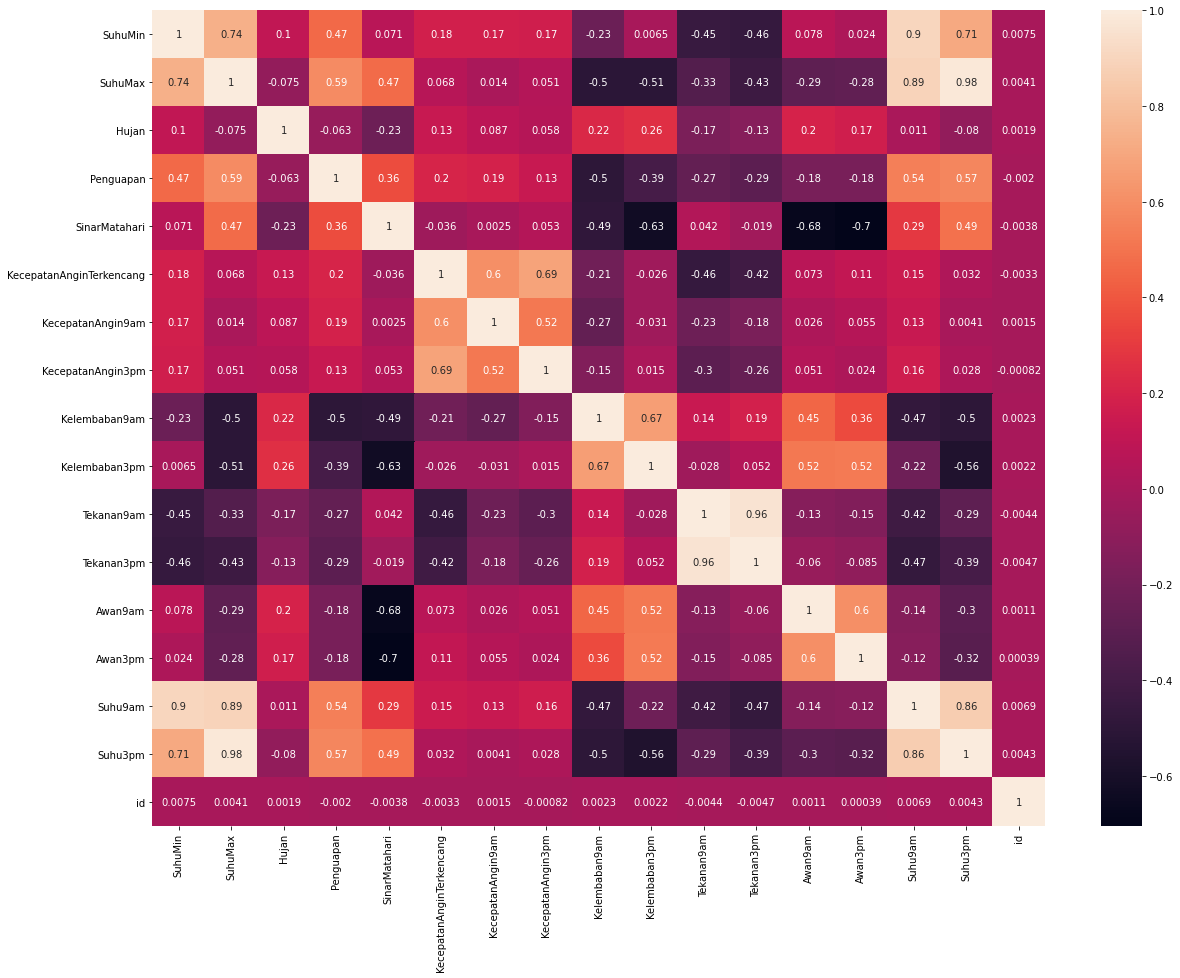

In [11]:
corr = dt_cluster.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True);

In [12]:
#dt_cluster['AverageTemperature'] = (dt_cluster['SuhuMin'] + dt_cluster['SuhuMax']) / 2

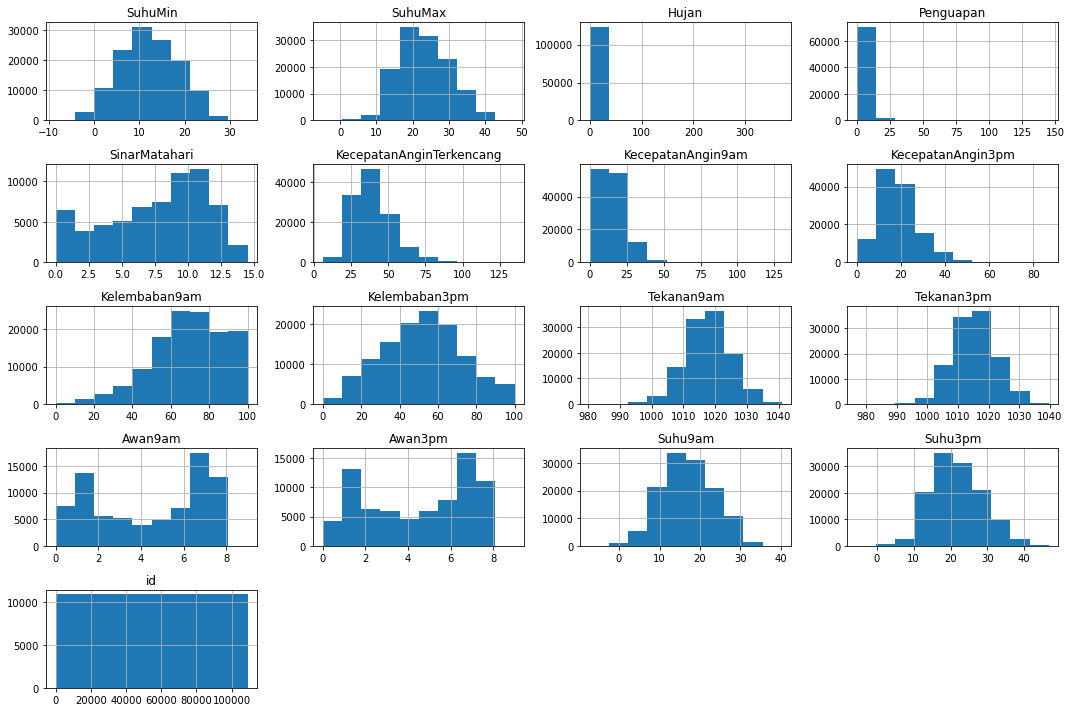

In [13]:
#CheckingDistribution
dt_cluster.hist(bins=10,figsize=(15,10))
plt.tight_layout()

In [14]:
#Checking For Outliers 
features_1 = [
    'SuhuMin','SuhuMax'
]
features_2 = [
    'Hujan','Penguapan','SinarMatahari'
]
features_3 = [
    'KecepatanAnginTerkencang','KecepatanAngin9am','KecepatanAngin3pm',
]
features_4 = [
    'Kelembaban9am','Kelembaban3pm'
]
features_5 = [
    'Tekanan9am','Tekanan3pm'
]
features_6 = [
    'Awan9am','Awan3pm'
]
features_7 = [
    'Suhu9am', 'Suhu3pm'
]


<AxesSubplot:>

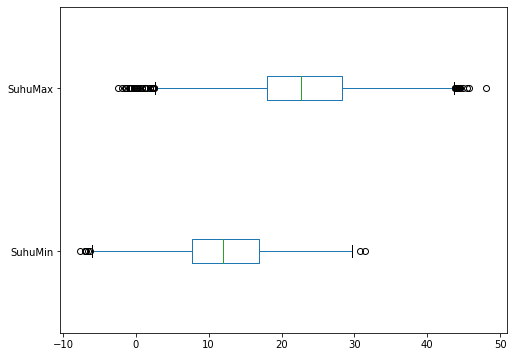

In [15]:
dt_test[features_1].plot(kind='box',figsize=(8,6),vert=False)

<AxesSubplot:>

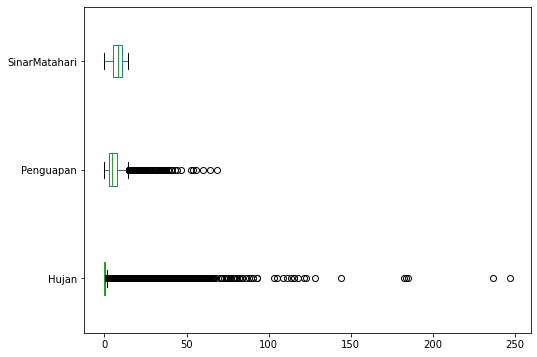

In [16]:
dt_test[features_2].plot(kind='box',figsize=(8,6),vert=False)

<AxesSubplot:>

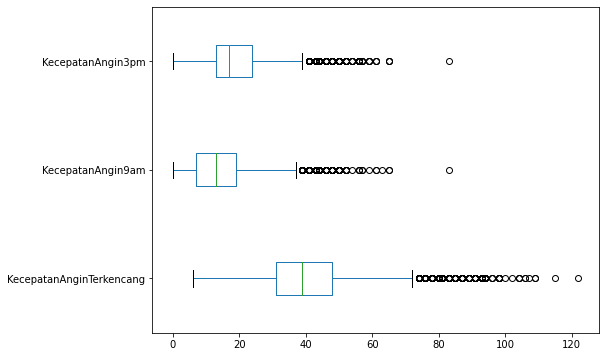

In [17]:
dt_test[features_3].plot(kind='box',figsize=(8,6),vert=False)

<AxesSubplot:>

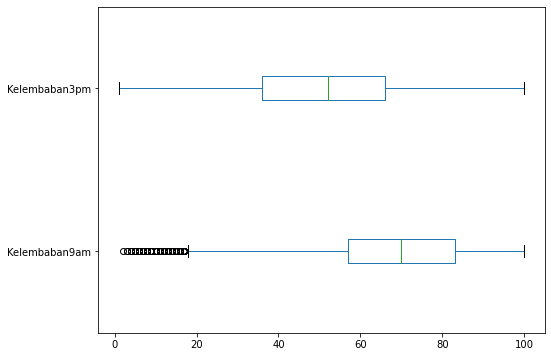

In [18]:
dt_test[features_4].plot(kind='box',figsize=(8,6),vert=False)

<AxesSubplot:>

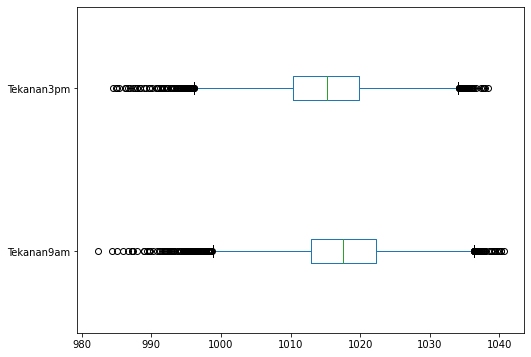

In [19]:
dt_test[features_5].plot(kind='box',figsize=(8,6),vert=False)

<AxesSubplot:>

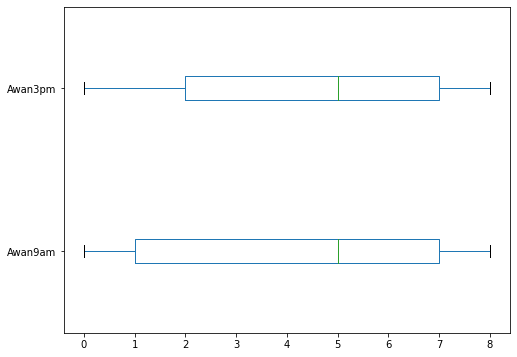

In [20]:
dt_test[features_6].plot(kind='box',figsize=(8,6),vert=False)

<AxesSubplot:>

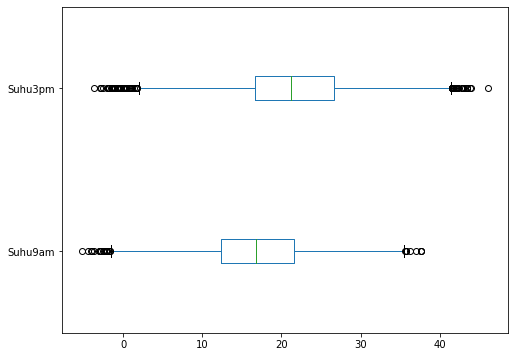

In [21]:
dt_test[features_7].plot(kind='box',figsize=(8,6),vert=False)

## Data Cleansing

In [22]:
#HandleMissingValueinDataset
dt_cluster = dt_cluster.fillna(dt_cluster.mean())

In [23]:
dt_cluster.isna().sum()

Tanggal                        0
KodeLokasi                     0
SuhuMin                        0
SuhuMax                        0
Hujan                          0
Penguapan                      0
SinarMatahari                  0
ArahAnginTerkencang         9025
KecepatanAnginTerkencang       0
ArahAngin9am                9231
ArahAngin3pm                3693
KecepatanAngin9am              0
KecepatanAngin3pm              0
Kelembaban9am                  0
Kelembaban3pm                  0
Tekanan9am                     0
Tekanan3pm                     0
Awan9am                        0
Awan3pm                        0
Suhu9am                        0
Suhu3pm                        0
BersaljuHariIni             2818
BersaljuBesok               2850
id                             0
dtype: int64

In [24]:
dt_cluster = dt_cluster.drop(['BersaljuHariIni','BersaljuBesok','id','ArahAnginTerkencang','ArahAngin9am','ArahAngin3pm','Tanggal','KodeLokasi'], axis=1)

## Feature Engineering

In [25]:
for col in dt_cluster.columns:
    dt_cluster[col] = (dt_cluster[col] - dt_cluster[col].min()) / (dt_cluster[col].max() - dt_cluster[col].min())

In [26]:
dt_model1cluster = dt_cluster[['SuhuMin','SuhuMax','Penguapan','SinarMatahari','Hujan']]
dt_model1cluster.head()

,SuhuMin,SuhuMax,Penguapan,SinarMatahari,Hujan
0,0.459906,0.610586,0.037718,0.441379,0.000000
1,0.436321,0.466919,0.037718,0.524407,0.000539
2,0.417453,0.604915,0.035862,0.717241,0.000000
3,0.617925,0.601134,0.031724,0.462069,0.000000
4,0.254717,0.240076,0.037718,0.524407,0.237197


In [34]:
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(dt_model1cluster)
dt_pca = pd.DataFrame(data = pca_fit, columns = ['PC1','PC2'])
dt_pca.head()

,PC1,PC2
0,-0.031415,0.065579
1,-0.055290,-0.057490
2,0.148950,-0.145496
3,0.048060,0.152275
4,-0.255343,-0.255518


Text(0.5, 1.0, 'Plot from Unclustered Data')

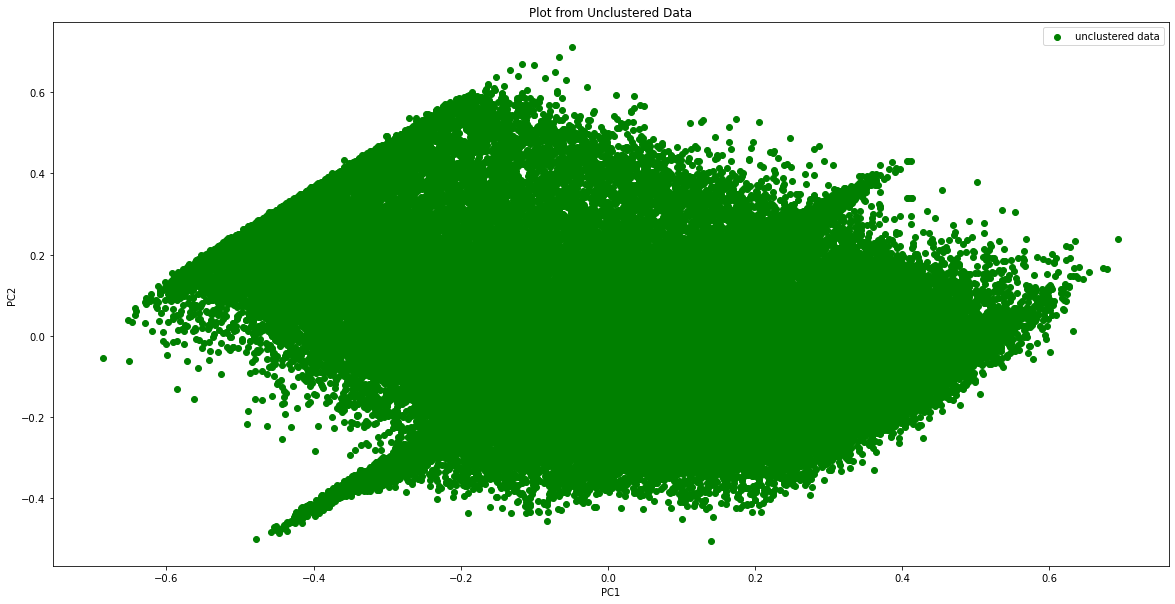

In [38]:
plt.figure(figsize=(20,10))
plt.scatter(dt_pca['PC1'],dt_pca['PC2'],c='green',label='unclustered data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('Plot from Unclustered Data')

In [29]:
def euclidean_dist(data,centroid):
    for i in range(len(data)):
        return np.sqrt(data[i] - centroid[i])**2

In [30]:
def sse_count(data,centorid):
    for i in range(len(data)):
        dist = []
        for j in range(len(centroids)):
            dist = euclidean_dist(data.iloc[i], centroids[j])
            dist.append(dist)
        sse = sse + min(dist) ** 2
    return sse